# Getting Started

### Name: Black Friday --- A study of sales through consumer behaviors
#### The dataset here is a sample of the transactions made in a retail store. The store wants to know the customer purchase behaviors  better. This dataset contains different kinds of variables either numerical and categorical. There are several following questions need to be concerned:
* What is the accuracy of predicting the amount of purchase? and which features are more important for predicting the amount of purchase?
* What is the accuracy of predicting the age of the consumer? and which features are more important for predicting the age of the consumer?
* What is the accuracy of predicting the category of goods bought? and which features are more important for predicting the category of goods bought?

### Source: https://www.kaggle.com/mehdidag/black-friday 

## DATASET

#### According to the initial analysis, the basic information of the Black Friday dataset has been summarized as follows. If you are interested in the detailed information of the summary, please check the 'Exploring  the Dataset' part.

### Input variables:
Have used 10 of them each time for predicting 3 different output variables: Purchase, Age and Product_Category_1
* Product_ID
* Gender
* Age
* Occupation
* City_Category
* Stay_In_Current_City_Years
* Marital_Status
* Product_Category_1
* Product_Category_2
* Product_Category_3
* Purchase


### Output variables: 
There are three following output variables need to be predicted: 
- Purchase

Predict the amount of purchase with the help of the information contained in the other 10 variables
- Age

Predict the age of the consumer with the help of the information contained in the other 10 variables

- Product_Category_1

Predict the category of goods bought in category1 with the help of the information contained in the other 10 variables

### Number of Observations: 537577
### Number of Attributes : 12
Use_ID is the only variable which doesn't include in the input variables
### Missing values (There is no missing value in the variables except the following two columns): 
* Product_Category_2: 166986
* Product_Category_3: 373299


## Exploring the Dataset

### Load the dataset and get the basic information of the dataset

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [3]:
# import os
# print(os.getcwd())

In [4]:
# Load the Census dataset
data = pd.read_csv("BlackFriday.csv")

In [5]:
# Display the first few records and get some information about this dataset
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
# Total number of records
n_records =  len(data)
print("Total number of records: {}".format(n_records))

Total number of records: 537577


In [8]:
# check the unique value and the type of each variable
for col in data.columns[1:]:
   print('{}: {}; Type: {}'.format(col, data[col].unique(), data[col].dtype))

Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']; Type: object
Gender: ['F' 'M']; Type: object
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']; Type: object
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]; Type: int64
City_Category: ['A' 'C' 'B']; Type: object
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']; Type: object
Marital_Status: [0 1]; Type: int64
Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9]; Type: int64
Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]; Type: float64
Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]; Type: float64
Purchase: [ 8370 15200  1422 ... 14539 11120 18426]; Type: int64


In [9]:
# how many different products include in this dataset
len(data['Product_ID'].unique())

3623

### Investigate and deal with the null values

In [10]:
# count the null values in each column
na_group = {}
for col in data:
    counts = data[col].value_counts(dropna=False)
    nan_counts = counts[counts.index.isnull()].values
    na_group[col] = nan_counts[0] if nan_counts else 0

/Users/Lili/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


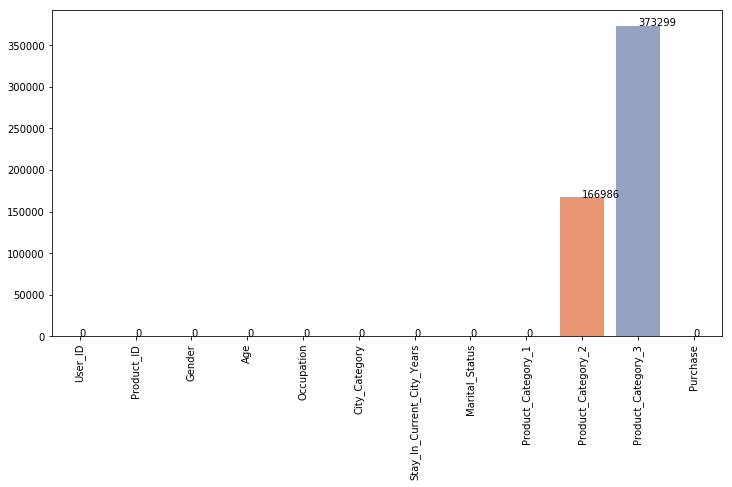

In [11]:
# visualize the null values in each column
x = na_group.keys()
y = na_group.values()
plt.figure(figsize=(12,6))
sns.barplot(x=list(x), y=list(y), palette="Set2")
plt.xticks(rotation=90)
for i, y in enumerate(na_group.values()):
    plt.annotate('{}'.format(y), xy=(i, y))
plt.show()

In [12]:
# There are three methods to deal with the missing data: delete it, fill value with 0 or mean and keep it.

# Evaluate the percentage of observation left if we choose to delete all null values
data_nonna = data.dropna(axis=0)
print(len(data_nonna), len(data))
print(len(data_nonna)/len(data))

164278 537577
0.3055897108693266


#### According to the above evaluation, it is inappropriate to delete all null values since we only get around 31% of the original dataset. Additionally, we cannot just keep the null values in the dataset since the unique value of each variable demonstrate that each variable has more than one dimension, and we need to perform one-hot encoding on them before the prediction. Thus, fill null value with 0 probably a better choice in this dataset.

In [13]:
# copy the original data into a new dataset and fill the null values with 0
data_edit = data.copy()
#imp = Imputer(missing_values='NaN', strategy='constant', fill_value=0, axis=0)
#imp = imp.fit(X)
data_edit['Product_Category_2'].fillna(0, inplace=True)
data_edit['Product_Category_3'].fillna(0, inplace=True)

# convert the 'Product_ID' into code
data_edit['ProductCodes'] = data['Product_ID'].astype('category').cat.codes

### Visualize the Dataset

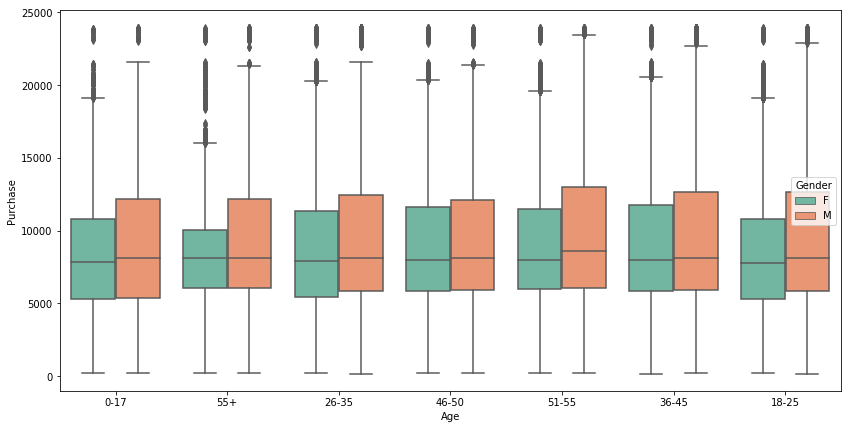

In [14]:
# boxplot the amount of purchase in each age group with different gender 
plt.figure(figsize=(14,7))
sns.boxplot(x=data_edit['Age'], y=data_edit['Purchase'], hue=data_edit['Gender'],
            palette="Set2")

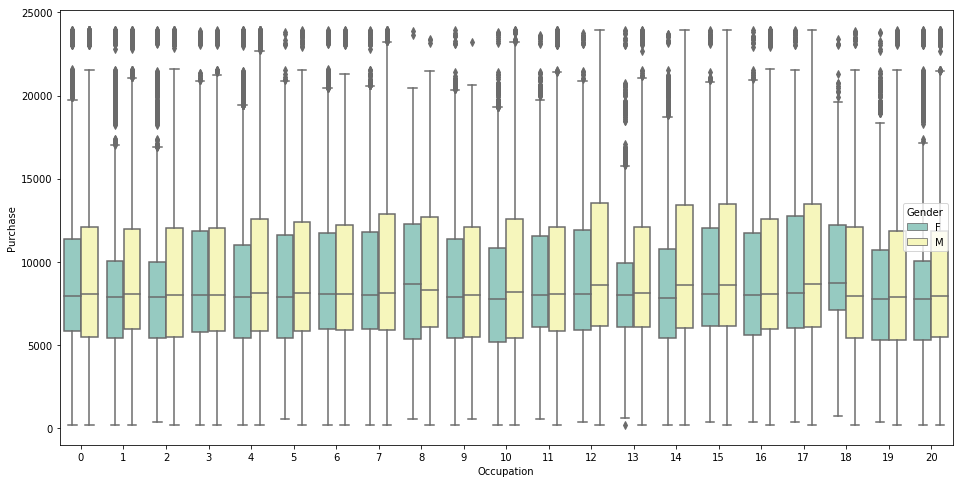

In [15]:
# boxplot the amount of purchase in each occupation group with different gender 
plt.figure(figsize=(16,8))
sns.boxplot(x=data_edit['Occupation'], y=data_edit['Purchase'], hue=data_edit['Gender'],
            palette="Set3")

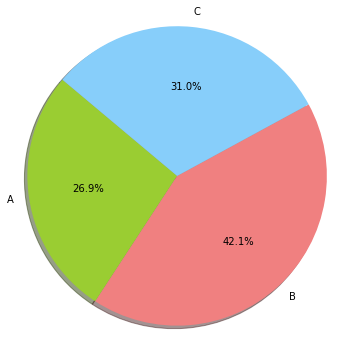

In [16]:
# pie plot the numbers of products has been bought in the different category of cities.
plt.figure(figsize=(6,6))
data_edit_city_PID = data.groupby('City_Category').count()['Product_ID']
labels = data_edit_city_PID.index
sizes = data_edit_city_PID.values
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

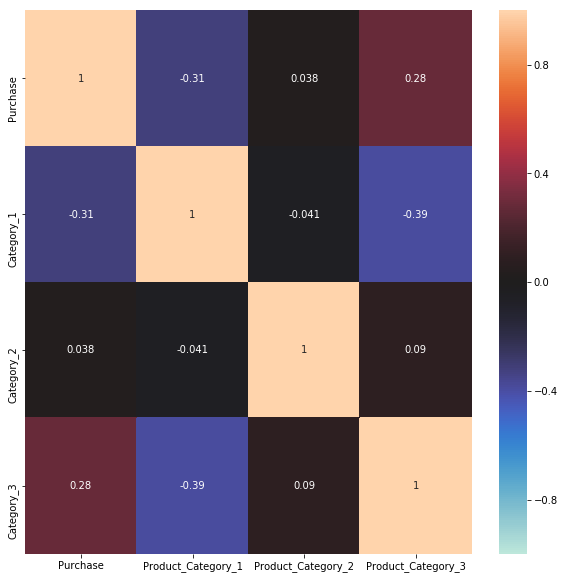

In [17]:
# Evaluate which product category and the purchase has high correlation with each other by heatmap since we will 
# conduct the prediction later for amount of purchase and category of the products

plt.figure(figsize=(10, 10))
corr = data_edit[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
#data_ed1 = data_ed.pivot('Occupation', 'Purchuse_ed')
sns.heatmap(corr.astype(float).corr().values, vmin=-1, vmax=1.0, annot=True, center=0,
            xticklabels=['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], 
            yticklabels=['Purchase', 'Category_1', 'Category_2', 'Category_3'])

#### According to the heatmap, the correlation between the purchase and the product category 1,  category 3 are higher than product category 2, so we can pay more attention to the amount of purchase with product category 1 and category 3 rather than product category 2. However, there are lots of missing value in Product_Category_2 and Product_Category_3, so we can concentrate on the amount of purchase with the product category 1 in further prediction.

### Discover the dataset by converting all categorical variables into numerical variables in the dataset

In [18]:
# For 'Purchase' variable

# According to the description of the original dataset above, the average of purchase is around $9,333, 
# so we can divide the purchase data into two group, one is > 9500, another is <= 9500. The evaluation is as follows:


# Number of records where purchase is more than $9,500
n_greater_9500 = len(data[data['Purchase'] > 9500])

# Number of records where purchase is at most $9,500
n_at_most_9500 = len(data[data['Purchase'] <= 9500])

# Percentage of purchase which is more than $9,500
greater_percent = n_greater_9500 / n_records *100

# results
print("Number of records where purchase is more than $9,500: {}".format(n_greater_9500))
print("Number of records where purchase is at most $9,500".format(n_at_most_9500))
print("Percentage of purchase more than $9,500: {}%".format(greater_percent))

Number of records where purchase is more than $9,500: 215681
Number of records where purchase is at most $9,500
Percentage of purchase more than $9,500: 40.12095011505328%


In [19]:
#creat a new dataset 'data_edit_num', and store all converted numerical variables
data_edit_num = data_edit.copy()

data_edit_num['Purchuse_ed'] = [0 if e <= 9500 else 1 for e in data_edit['Purchase']]

data_edit_num['Gender'] = [0 if e == 'F' else 1 for e in data_edit['Gender']]

dict_age = {'0-17': 0, '18-25': 1, '26-35': 2, 
            '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}

dict_city_yrs = {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}

dict_city_category = {'A': 0, 'B': 1, 'C': 2}

    
data_edit_num['Age'] = data_edit_num['Age'].map(dict_age)
data_edit_num['Stay_In_Current_City_Years'] = data_edit_num['Stay_In_Current_City_Years'].map(dict_city_yrs)
data_edit_num['City_Category'] = data_edit_num['City_Category'].map(dict_city_category)

In [20]:
data_edit_num.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,ProductCodes,Purchuse_ed
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370,670,0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,2374,1
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422,850,0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057,826,0
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969,2732,0


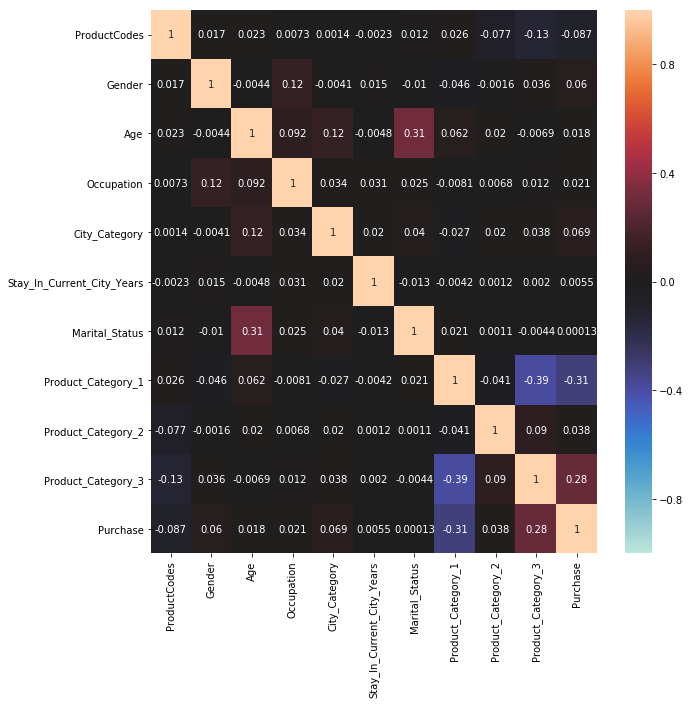

In [21]:
plt.figure(figsize=(10, 10))
corr = data_edit_num[['ProductCodes', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]

sns.heatmap(corr.astype(float).corr().values, vmin=-1, vmax=1.0, annot=True, center=0,
            xticklabels=['ProductCodes','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'], 
            yticklabels=['ProductCodes','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'])

#### According to the heatmap, we can observe each correlation between two variables in the dataset. The correlation between the purchase and product category1, category3 are higher than others. This heatmap doesn't provide more useful information than the first heatmap since we haven't found which feature is more important for the following prediction. Using the random forests for prediction analysis probably is a good choice for this dataset since the random forests provide relatively good accuracy and robustness, and it also can help us to select the important features by mean decrease impurity method.

## Predictive Analytics

#### There are three predictions we are going to conduct: 
- Predict the amount of purchase with the help of the information contained in the other 10 variables
- Predict the age of the consumer with the help of the information contained in the other 10 variables
- Predict the category of goods bought in category1 with the help of the information contained in the other 10 variables

#### 1. Predict the amount of purchase

In [22]:
# create the 'features' (x) and 'Purchase' (y) data and split them into training and testing datasets
feature_columns = ['ProductCodes', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
X_purchase = data_edit[feature_columns]
y_purchase = data_edit['Purchase']

X_purchase = pd.get_dummies(X_purchase)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_purchase, y_purchase, test_size=0.3, random_state=12345)

In [23]:
# Predict the amount of purchase and print the accuracy with mean squared error and r2 score
model_rfr = RandomForestRegressor(max_depth=20, min_samples_leaf=1, n_estimators=30)
result_rfr = model_rfr.fit(X_train, y_train)
yhat_rfr = result_rfr.predict(X_test)

print(sklearn.metrics.mean_squared_error(y_test, yhat_rfr))
print(sklearn.metrics.r2_score(y_test, yhat_rfr))

7617358.6758976905
0.6918652630731172


In [24]:
#  select the important features by mean decrease impurity method
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 8), result_rfr.feature_importances_), list(X_train.columns)), 
             reverse=True))

Features sorted by their score:
[(0.73893274, 'Product_Category_1'), (0.0848076, 'ProductCodes'), (0.0458496, 'Occupation'), (0.01564908, 'Product_Category_2'), (0.01375969, 'Product_Category_3'), (0.01029962, 'Marital_Status'), (0.00728112, 'Stay_In_Current_City_Years_1'), (0.00676687, 'Age_26-35'), (0.00651131, 'Stay_In_Current_City_Years_3'), (0.00646612, 'Stay_In_Current_City_Years_2'), (0.00619977, 'Age_18-25'), (0.00606858, 'Stay_In_Current_City_Years_4+'), (0.00603226, 'City_Category_C'), (0.0058444, 'Age_36-45'), (0.00583397, 'Stay_In_Current_City_Years_0'), (0.00529025, 'City_Category_B'), (0.00522863, 'City_Category_A'), (0.00479688, 'Gender_F'), (0.00477597, 'Gender_M'), (0.00414935, 'Age_46-50'), (0.00411282, 'Age_51-55'), (0.00289724, 'Age_55+'), (0.00244612, 'Age_0-17')]


#### Per the analysis, the accuracy of predicting the amount of purchase is around 69% when we set  20 layers, minimum leaf equal to 1 and 30 trees in the model. This probably is the best result after trying different parameters for the model. Moreover, the features, such as Product_Category_1, ProductCodes, Occupation, are more important for predicting the amount of purchase than others in this dataset.

 #### 2.Predict the age of the consumer

In [25]:
# create the 'features' (x) and 'Age' (y) data and split them into training and testing datasets
feature_columns = ['ProductCodes', 'Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 
                   'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']
X_age = data_edit[feature_columns]
y_age = data_edit['Age'].astype('category').cat.codes

X_age = pd.get_dummies(X_age)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_age, y_age, test_size=0.3, random_state=12345)

In [26]:
# classify the age groups and print the accuracy with precision, recall and f1 score
model_rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=1, n_estimators=30)
result_rfc = model_rfc.fit(X_train, y_train)
yhat_rfc = result_rfc.predict(X_test)
print(sklearn.metrics.classification_report(y_test, yhat_rfc))

             precision    recall  f1-score   support

          0       0.87      0.77      0.82      4457
          1       0.70      0.62      0.66     29453
          2       0.62      0.76      0.69     64388
          3       0.57      0.53      0.55     32145
          4       0.55      0.45      0.49     13308
          5       0.54      0.37      0.44     11302
          6       0.65      0.43      0.52      6221

avg / total       0.62      0.62      0.62    161274



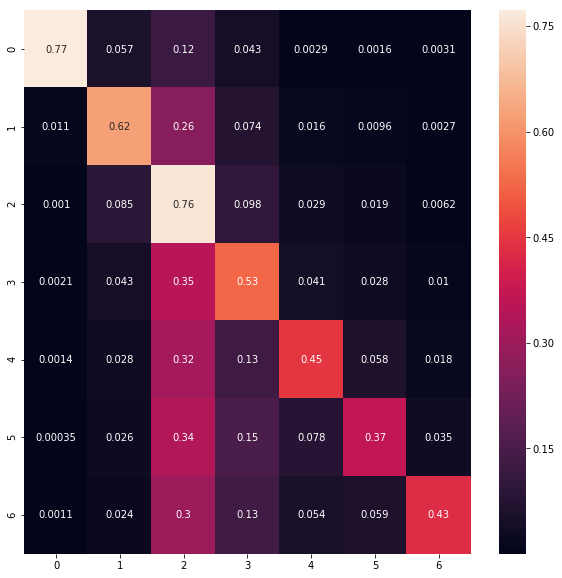

In [27]:
# plot the confusion matrix to visualize the accuracy in each class
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, yhat_rfc)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)

In [30]:
# select the important features by mean decrease impurity method
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 8), result_rfc.feature_importances_), list(X_train.columns)), 
             reverse=True))

Features sorted by their score:
[(0.36167218, 'Occupation'), (0.18837885, 'Purchase'), (0.14221954, 'ProductCodes'), (0.05984077, 'Product_Category_2'), (0.05437237, 'Product_Category_1'), (0.03881933, 'Marital_Status'), (0.03658942, 'Product_Category_3'), (0.01385299, 'Stay_In_Current_City_Years_1'), (0.0132869, 'Stay_In_Current_City_Years_4+'), (0.01269823, 'Stay_In_Current_City_Years_2'), (0.01237025, 'City_Category_A'), (0.01218944, 'Stay_In_Current_City_Years_3'), (0.0118378, 'Gender_F'), (0.01166831, 'Gender_M'), (0.01144569, 'Stay_In_Current_City_Years_0'), (0.0098001, 'City_Category_C'), (0.00895783, 'City_Category_B')]


#### According to the analysis, the average accuracy of predicting the age group is around 62% when we set  20 layers, minimum leaf equal to 1 and 30 trees in the model. This probably is the best result after trying different parameters for the model. Additionally, the confusion matrix tells us that the classes 0, 1 and 2 have the higher accuracy than others, and lots of values have been predicted as class 2 due to its higher amount of data than other classes. Moreover, the features, such as Occupation, Purchase, ProductCodes, are more important for predicting the age group than others in this dataset.

#### 3.Predict the category of goods bought in category1

In [31]:
# create the 'features' (x) and 'Product_Category_1' (y) data and split them into training and testing datasets
feature_columns = ['ProductCodes', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 
                   'Marital_Status', 'Purchase']
X_category = data_edit[feature_columns]
y_category = data_edit['Product_Category_1'].astype('category').cat.codes

X_category = pd.get_dummies(X_category)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_category, y_category, test_size=0.3, random_state=12345)

In [32]:
# classify the Product_Category_1 groups and print the accuracy with precision, recall and f1 score
model_rfc_c = RandomForestClassifier(max_depth=20, min_samples_leaf=1, n_estimators=20)
result_rfc_c = model_rfc_c.fit(X_train, y_train)
yhat_rfc_c = result_rfc_c.predict(X_test)
print(sklearn.metrics.classification_report(y_test, yhat_rfc_c))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85     41351
          1       0.72      0.37      0.49      7018
          2       0.88      0.60      0.71      6000
          3       0.77      0.42      0.54      3476
          4       0.76      0.99      0.86     44894
          5       0.75      0.47      0.58      6081
          6       0.44      0.12      0.18      1104
          7       0.80      0.88      0.84     33552
          8       0.70      0.06      0.11       116
          9       0.92      0.46      0.61      1484
         10       0.84      0.42      0.56      7115
         11       0.82      0.46      0.59      1098
         12       0.88      0.66      0.75      1632
         13       0.40      0.03      0.05       470
         14       0.70      0.23      0.35      1802
         15       0.67      0.36      0.46      2944
         16       0.70      0.08      0.15       171
         17       0.52      0.07      0.12   

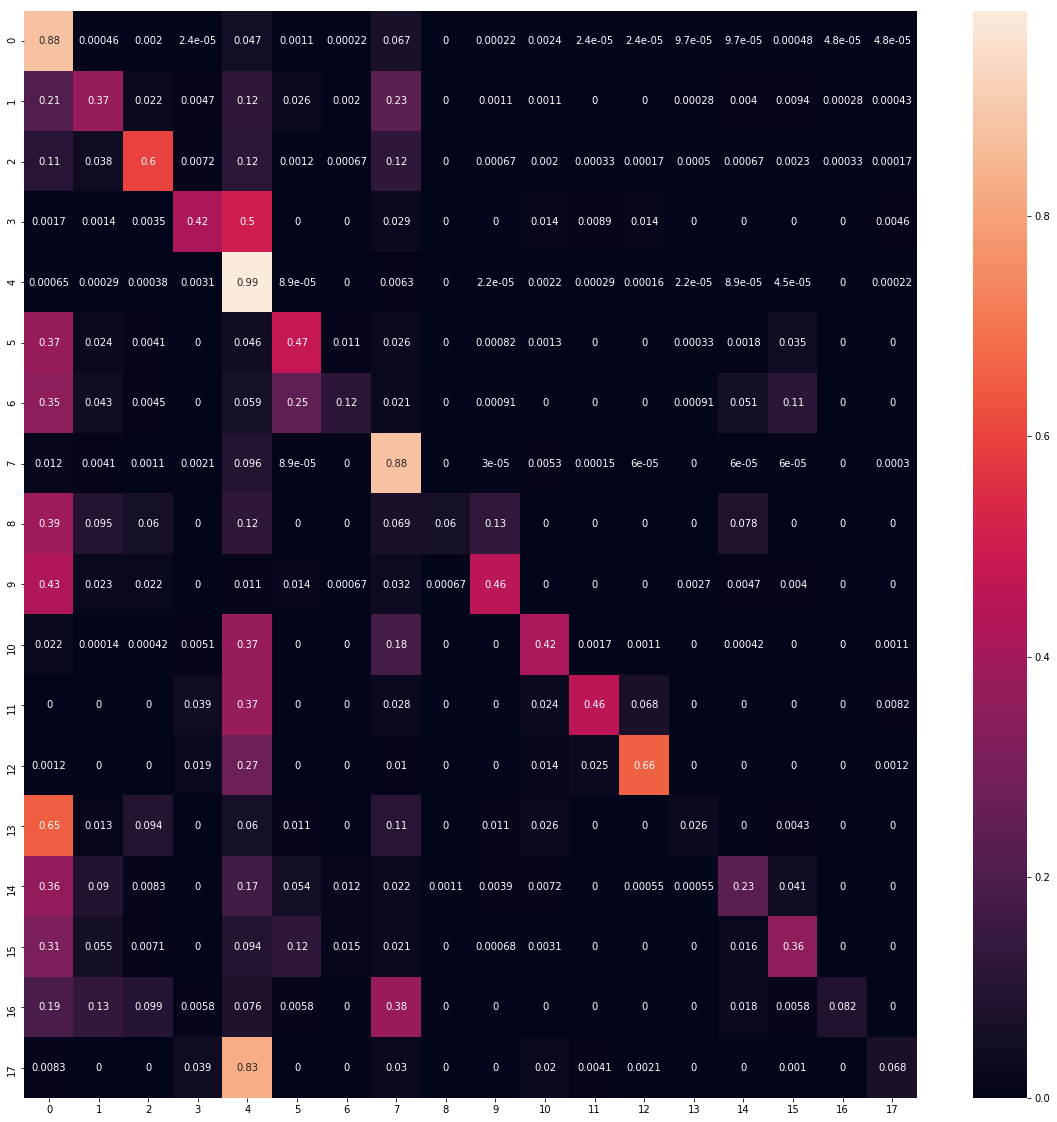

In [33]:
# plot the confusion matrix to visualize the accuracy in each class
plt.figure(figsize=(20,20))
cm = confusion_matrix(y_test, yhat_rfc_c)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True)

In [34]:
# select the important features by mean decrease impurity method
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 8), result_rfc_c.feature_importances_), list(X_train.columns)), 
             reverse=True))

Features sorted by their score:
[(0.7229827, 'Purchase'), (0.18176067, 'ProductCodes'), (0.04252436, 'Occupation'), (0.00772581, 'Marital_Status'), (0.00424662, 'Stay_In_Current_City_Years_1'), (0.00377992, 'Stay_In_Current_City_Years_2'), (0.00372964, 'Stay_In_Current_City_Years_3'), (0.00358229, 'Stay_In_Current_City_Years_4+'), (0.00350834, 'Stay_In_Current_City_Years_0'), (0.0033677, 'City_Category_B'), (0.00307757, 'City_Category_C'), (0.00295651, 'Gender_M'), (0.00283847, 'City_Category_A'), (0.00237754, 'Age_26-35'), (0.00232194, 'Age_36-45'), (0.00178678, 'Age_46-50'), (0.00171163, 'Age_18-25'), (0.00161378, 'Age_51-55'), (0.00157368, 'Gender_F'), (0.00144578, 'Age_55+'), (0.00108825, 'Age_0-17')]


#### Per the analysis, the average accuracy of predicting the product category 1 is around 79% when we set  20 layers, minimum leaf equal to 1 and 20 trees in the model. This probably is the best result after trying different parameters for the model. Additionally, the confusion matrix tells us that the classes 0, 2, 4, 7 and 12 have the higher accuracy than others, and lots of values have been predicted as classes 0, 4 and 7 due to its higher amount of data than other classes. Moreover, the features, such as Purchase and ProductCodes, are more important for predicting the product category 1 than others in this dataset.

In [37]:
# compare the prediction result by random forest with the gaussian naive bayes

model_gnb = GaussianNB()
result_gnb = model_gnb.fit(X_train, y_train)
yhat_gnb = result_gnb.predict(X_test)
print(sklearn.metrics.classification_report(y_test, yhat_gnb))

             precision    recall  f1-score   support

          0       0.56      0.75      0.65     41351
          1       0.32      0.00      0.01      7018
          2       0.12      0.07      0.09      6000
          3       0.25      0.39      0.31      3476
          4       0.49      0.68      0.57     44894
          5       0.13      0.00      0.00      6081
          6       0.50      0.00      0.00      1104
          7       0.42      0.35      0.38     33552
          8       0.00      0.00      0.00       116
          9       0.24      0.16      0.19      1484
         10       0.24      0.05      0.08      7115
         11       0.40      0.46      0.43      1098
         12       0.78      0.92      0.85      1632
         13       0.00      0.00      0.00       470
         14       0.00      0.00      0.00      1802
         15       0.19      0.01      0.01      2944
         16       0.04      0.06      0.05       171
         17       0.16      0.22      0.19   

/Users/Lili/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Comparing the average accuracy of the prediction result by the gaussian naive bayes which is 0.43, the random forests provides us a better result which is 0.79.